## Customer Support Ticket

The dataset is available on [Kaggle](https://www.kaggle.com/datasets/suraj520/customer-support-ticket-dataset)

In this project, I will be working with a Customer Support Ticket dataset that includes customer support tickets for various tech products. This dataset contains customer inquiries related to hardware and software issues, network problems, account access, data loss, and other support topics. It also provides information about the customer, when they purchased the product, what type of ticket, the ticket channel, status, and any other relevant details. 

When a customer sends in a ticket for an issue they are facing, it is important to quickly and correctly diagnose the issue and solve it to maintain customer satisfaction. However, some tickets have a higher priority than others, and must be addressed promptly to avoid escalations. 

For the analysis, I will be using natural language processing to automate ticket categorization and sentiment analysis. Splitting the data into training and test sets, I will turn the ticket description into token words, then use Tifid Vectorization to use in analysis. From the variables provided by the dataset, ticket priority will be the target variable. I will use ticket subject, product type, and the token words from the ticket description to determine the priority of the ticket. Ticket priority will tell the critical nature of the ticket, allowing the customer support team to know whether the ticket needs to be prioritized. 

First, let's take a look at what the data set looks like.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("customer_support_tickets.csv")
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


Text(0.5, 1.0, 'Counts of Ticket Types')

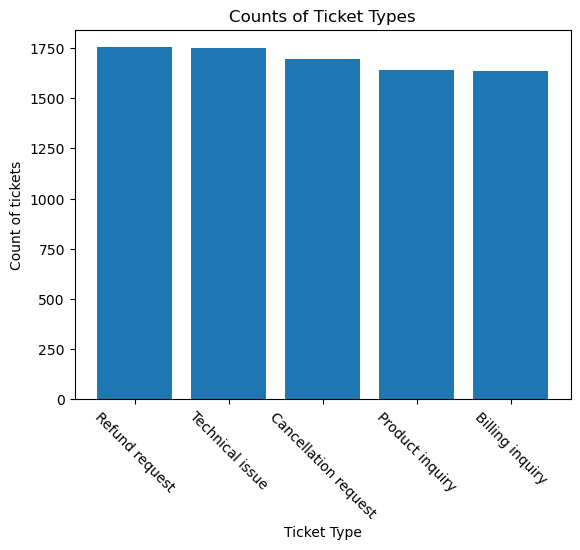

In [55]:
type_value_counts = df['Ticket Type'].value_counts()
plt.bar(type_value_counts.index, type_value_counts.values)
plt.xlabel('Ticket Type')
plt.ylabel('Count of tickets')
plt.xticks(rotation=-45)
plt.title('Counts of Ticket Types')

This graph shows that each of these different ticket types are submitted at roughly equal amounts, with the top types being refund requests and technical issues. This also shows that there's five different types of tickets that they can be classified as.

Now let's see the different ticket subjects that can be submitted.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Refund request'),
  Text(1, 0, 'Software bug'),
  Text(2, 0, 'Product compatibility'),
  Text(3, 0, 'Delivery problem'),
  Text(4, 0, 'Hardware issue'),
  Text(5, 0, 'Battery life'),
  Text(6, 0, 'Network problem'),
  Text(7, 0, 'Installation support'),
  Text(8, 0, 'Product setup'),
  Text(9, 0, 'Payment issue'),
  Text(10, 0, 'Product recommendation'),
  Text(11, 0, 'Account access'),
  Text(12, 0, 'Peripheral compatibility'),
  Text(13, 0, 'Data loss'),
  Text(14, 0, 'Cancellation request'),
  Text(15, 0, 'Display issue')])

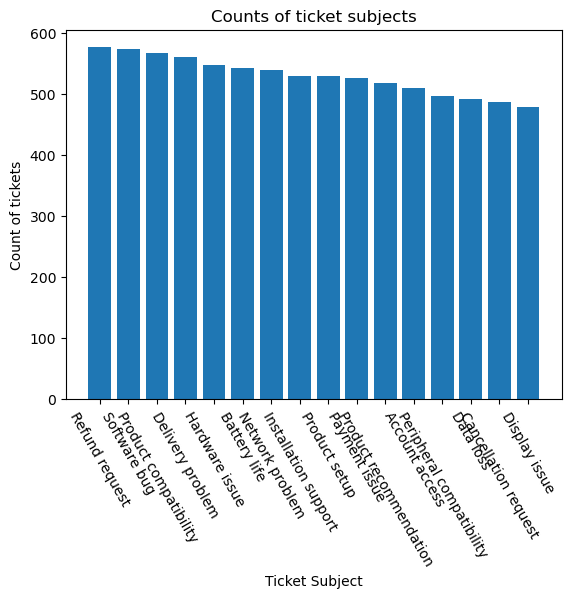

In [56]:
sub_val_count = df['Ticket Subject'].value_counts()
plt.bar(sub_val_count.index, sub_val_count.values)
plt.xlabel('Ticket Subject')
plt.ylabel('Count of tickets')
plt.title('Counts of ticket subjects')
plt.xticks(rotation=-60)

There are 16 different ticket subjects to be submitted, again with the number one being refund request, which we can assume goes straight to refund request as a ticket type. There are few others, like cancellation request, that we can see goes right into cancellation request ticket type. Additionally, payment issue can be assumed to go under billing inquiry. The others may take some extra information to determine if they belong in technical issue or product inquiry, or even one of the other ticket types. 

Next, let's take a look at customer satisfaction when tickets are completed quicker. This will give us insight to how valuable this automation process will be.

In [57]:
# first convert each column from str type to datetime type
df['First Response Time'] = pd.to_datetime(df['First Response Time'])
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'])

In [58]:
# find the difference between the columns
# gives difference in minutes
import numpy as np
df['Time elapsed'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds()/ 60
# remove any negative time values
df['Time elapsed'] = df['Time elapsed'].apply(lambda x : x if x >= 0 else np.nan)
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Time elapsed
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaT,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaT,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,411.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,NaN
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,1181.0


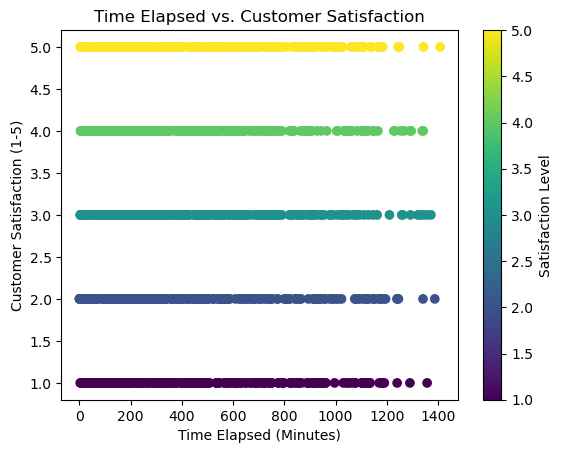

In [59]:
plt.scatter(df['Time elapsed'], df['Customer Satisfaction Rating'], c=df['Customer Satisfaction Rating'], cmap='viridis', marker='o')
plt.xlabel('Time Elapsed (Minutes)')
plt.ylabel('Customer Satisfaction (1-5)')
plt.title('Time Elapsed vs. Customer Satisfaction')

# Add colorbar to represent customer satisfaction levels
cbar = plt.colorbar()
cbar.set_label('Satisfaction Level')

Although it doesn't show a strong trend, we can see that as time increases for how long a ticket stays open, it is less likely to receive a 5. This shows it is necessary to automate this process to increase customer satisfaction.

Now let's take a look at the distribution of ticket priorities.

Text(0.5, 1.0, 'Ticket Priority Distribution')

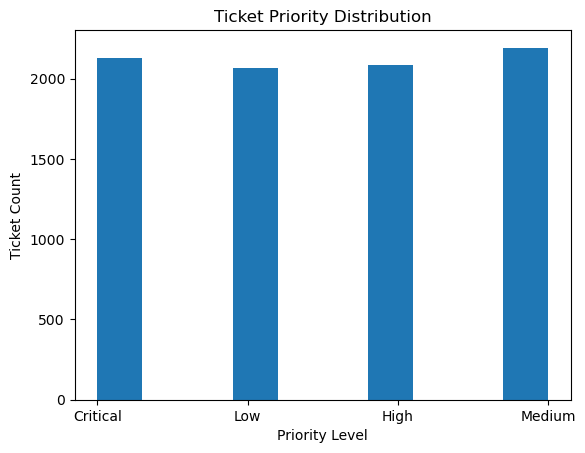

In [60]:
plt.hist(df['Ticket Priority'])
plt.xlabel('Priority Level')
plt.ylabel('Ticket Count')
plt.title('Ticket Priority Distribution')

This shows that the distribution of the tickets is pretty even. Most tickets are medium level, followed by critical, and evenly low and high. 

From what we have seen so far, the distributions of the tickets in terms of ticket subject and priority is spread evenly throughout. Figuring out what qualifies a ticket to be indicated as such is the next step in this project. Using either TextBlob or Vader sentiment analysis, we can determine if the ticket qualifies within a certain subject, and then determining which type it fits into. 

# Project Milestone 2 - Data Preparation
In this section, I will be going through the data and preparing it for modeling. Data preparation involves the process of cleaning, preprocessing, and transforming raw data into a format suitable for training and evaluating machine learning models. This ensures that the data is free from errors, consistent, and structured in a way that facilitates effective analysis and model building.

First let's take a look again at the dataset.

In [93]:
print(df.shape)
df.head()

(8469, 18)


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Time elapsed
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaT,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaT,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,411.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,NaN
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,1181.0


#### Dropping unnecessary features

I do not need any of the customer's personal information. Thus, I can remove the Customer Name, email, and to avoid any unintentional bias, remove the age and gender of the customer as well. I will leave the ticket ID to ensure that each ticket is unique, and re-index the dataframe to make the ID the index. 

In [9]:
df.drop(columns=['Customer Name', 'Customer Email'], inplace = True)
df.head()

,Ticket ID,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Time elapsed
0,1,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaT,NaN,NaN
1,2,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaT,NaN,NaN
2,3,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,411.0
3,4,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,NaN
4,5,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,1181.0


#### Dealing with missing data
I see quite a few NaN or NaT values in this small preview. Let's see how many missing values are present in each column.

In [10]:
df.isnull().sum()

Ticket ID                          0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
Time elapsed                    7065
dtype: int64

Taking a look at the missing values, it is good that there is no missing values until the Resolution. There are a variety of tickets in this dataset, including tickets that have not been closed yet. This is why we would have missing resolutions, would then lead to missing time to resolutions and missing customer satisfaction ratings. And while a First Response time would be great for all values, these values are not critical for the modeling we will be doing. 

Now, we can split the data into its own DataFrame and take only the variables we need. Let's look back at what we're trying to accomplish. I want to predict ticket priority, whether it be Low, Medium, High, or Critical based off of the ticket description. I will create a subset of the dataframe using the different features I will need.

I will try using ticket ID to maintain uniqueness in each row, and use the ticket description as predictor variables.

#### First Dataframe - Ticket Priority prediction
We will take the Ticket ID, Ticket Priority, and Ticket Description in this dataframe. I will then convert the ticket priority to integers, with low, medium, high, and critical becoming 1, 2, 3, and 4 respectively. Then, I will turn the Ticket Desription to token words.

In [11]:
df_priority = df[['Ticket ID', 'Ticket Priority', 'Ticket Description']]
df_priority.head()

,Ticket ID,Ticket Priority,Ticket Description
0,1,Critical,I'm having an issue with the {product_purchase...
1,2,Critical,I'm having an issue with the {product_purchase...
2,3,Low,I'm facing a problem with my {product_purchase...
3,4,Low,I'm having an issue with the {product_purchase...
4,5,Low,I'm having an issue with the {product_purchase...


In [12]:
# convert ticket priority to integers 
# low, medium, high, critical -> 1, 2, 3, 4
def convert(x):
    if x == 'Low':
        return 1
    elif x == 'Medium':
        return 2
    elif x == 'High':
        return 3
    else:
        return 4

df_priority['Ticket Priority'] = df_priority['Ticket Priority'].apply(lambda x : convert(x))
df_priority.head()

/var/folders/c_/ty5g43f545b0gyqglrb72nnr0000gq/T/ipykernel_12698/2257678756.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_priority['Ticket Priority'] = df_priority['Ticket Priority'].apply(lambda x : convert(x))


,Ticket ID,Ticket Priority,Ticket Description
0,1,4,I'm having an issue with the {product_purchase...
1,2,4,I'm having an issue with the {product_purchase...
2,3,1,I'm facing a problem with my {product_purchase...
3,4,1,I'm having an issue with the {product_purchase...
4,5,1,I'm having an issue with the {product_purchase...


In [13]:
# now to convert ticket description to token words
# first let's convert all text to lowercase
df_priority['Ticket Description'] = df_priority['Ticket Description'].apply(lambda x: x.lower())
df_priority.head()

/var/folders/c_/ty5g43f545b0gyqglrb72nnr0000gq/T/ipykernel_12698/331786356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_priority['Ticket Description'] = df_priority['Ticket Description'].apply(lambda x: x.lower())


,Ticket ID,Ticket Priority,Ticket Description
0,1,4,i'm having an issue with the {product_purchase...
1,2,4,i'm having an issue with the {product_purchase...
2,3,1,i'm facing a problem with my {product_purchase...
3,4,1,i'm having an issue with the {product_purchase...
4,5,1,i'm having an issue with the {product_purchase...


In [14]:
# next let's remove punctation and special characters
import re
df_priority['Ticket Description'] = df_priority['Ticket Description'].apply(lambda review : re.sub(r'[^a-zA-Z0-9\s]+', '', review))
df_priority.head()

/var/folders/c_/ty5g43f545b0gyqglrb72nnr0000gq/T/ipykernel_12698/3114126069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_priority['Ticket Description'] = df_priority['Ticket Description'].apply(lambda review : re.sub(r'[^a-zA-Z0-9\s]+', '', review))


,Ticket ID,Ticket Priority,Ticket Description
0,1,4,im having an issue with the productpurchased p...
1,2,4,im having an issue with the productpurchased p...
2,3,1,im facing a problem with my productpurchased t...
3,4,1,im having an issue with the productpurchased p...
4,5,1,im having an issue with the productpurchased p...


In [15]:
# next let's remove the stop words (ex: and, but, can, or, the, etc.)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# first download the stopwords
# then set the stop words (creates a list)
stop_words = set(stopwords.words('english'))

# now let's remove the stopwords
df_priority['Token Words'] = df_priority['Ticket Description'].apply(lambda review : [w for w in word_tokenize(review) if not w in stop_words])
df_priority.head()

/var/folders/c_/ty5g43f545b0gyqglrb72nnr0000gq/T/ipykernel_12698/1353597455.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_priority['Token Words'] = df_priority['Ticket Description'].apply(lambda review : [w for w in word_tokenize(review) if not w in stop_words])


,Ticket ID,Ticket Priority,Ticket Description,Token Words
0,1,4,im having an issue with the productpurchased p...,"[im, issue, productpurchased, please, assist, ..."
1,2,4,im having an issue with the productpurchased p...,"[im, issue, productpurchased, please, assist, ..."
2,3,1,im facing a problem with my productpurchased t...,"[im, facing, problem, productpurchased, produc..."
3,4,1,im having an issue with the productpurchased p...,"[im, issue, productpurchased, please, assist, ..."
4,5,1,im having an issue with the productpurchased p...,"[im, issue, productpurchased, please, assist, ..."


In [16]:
# next let's apply NLTK's Porter Stemmer
# Stemmers remove morphological affixes from words, leaving only the word stem.
# ex: boxes -> box, cats -> cat, jogging -> jog etc.
from nltk.stem import *
stemmer = PorterStemmer()
df_priority['Token Words'] = df_priority['Token Words'].apply(lambda words : [stemmer.stem(word) for word in words])
df_priority.head()

/var/folders/c_/ty5g43f545b0gyqglrb72nnr0000gq/T/ipykernel_12698/1662054937.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_priority['Token Words'] = df_priority['Token Words'].apply(lambda words : [stemmer.stem(word) for word in words])


,Ticket ID,Ticket Priority,Ticket Description,Token Words
0,1,4,im having an issue with the productpurchased p...,"[im, issu, productpurchas, pleas, assist, bill..."
1,2,4,im having an issue with the productpurchased p...,"[im, issu, productpurchas, pleas, assist, need..."
2,3,1,im facing a problem with my productpurchased t...,"[im, face, problem, productpurchas, productpur..."
3,4,1,im having an issue with the productpurchased p...,"[im, issu, productpurchas, pleas, assist, prob..."
4,5,1,im having an issue with the productpurchased p...,"[im, issu, productpurchas, pleas, assist, note..."


Now this dataframe is ready for modeling.

# Project Milestone 3 - Modeling & Evaluation
In this section, I will be establishing models for the data and evaluating them.

In [18]:
# next we will be creating a bag of words matrix using the Tfid Vectorizer
# num of rows in this matrix will be equal to num of rows in original dataframe (25000)
# each row is a word-count vector for a single movie review

from sklearn.feature_extraction.text import TfidfVectorizer

# create a dictionary vectorizer
vectorizer = TfidfVectorizer(max_features = 25000)

# let's put the list under token_words into a string separated by spaces
# this will make it easier to convert to feature matrix using CountVectorizer
df_priority['Token Words String'] = df_priority['Token Words'].apply(lambda x : ' '.join(x))

df_priority.head()

/var/folders/c_/ty5g43f545b0gyqglrb72nnr0000gq/T/ipykernel_12698/660707290.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_priority['Token Words String'] = df_priority['Token Words'].apply(lambda x : ' '.join(x))


,Ticket ID,Ticket Priority,Ticket Description,Token Words,Token Words String
0,1,4,im having an issue with the productpurchased p...,"[im, issu, productpurchas, pleas, assist, bill...",im issu productpurchas pleas assist bill zip c...
1,2,4,im having an issue with the productpurchased p...,"[im, issu, productpurchas, pleas, assist, need...",im issu productpurchas pleas assist need chang...
2,3,1,im facing a problem with my productpurchased t...,"[im, face, problem, productpurchas, productpur...",im face problem productpurchas productpurchas ...
3,4,1,im having an issue with the productpurchased p...,"[im, issu, productpurchas, pleas, assist, prob...",im issu productpurchas pleas assist problem yo...
4,5,1,im having an issue with the productpurchased p...,"[im, issu, productpurchas, pleas, assist, note...",im issu productpurchas pleas assist note selle...


Next let's split the data and prepare it for modeling.

In [33]:
from sklearn.model_selection import train_test_split
x = df_priority[['Token Words String']]
y = df_priority[['Ticket Priority']]
y = np.ravel(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

# fit the TfidfVectorizer on the training data
vectorizer.fit(x_train['Token Words String'])

# transform both training and testing data with the same vectorizer
x_train_transformed = vectorizer.transform(x_train['Token Words String'])
x_test_transformed = vectorizer.transform(x_test['Token Words String'])

Now let's create the Logistic Regression Model.

I chose to do Logistic because this is a classic classification problem. Using multinomial logistic regression, the model can use the token words to determine the priority of the ticket. 

In [34]:
# importing necessary package 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# creating the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# fit the model
model.fit(x_train_transformed, y_train)

# make predictions
y_pred = model.predict(x_test_transformed)

# evaluate the accuracy
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression Model: {acc1}")

Accuracy of Logistic Regression Model: 0.2554112554112554


Wow! That's shockingly low! I am tempted to try a different model, but let's see if I can improve this one using hyperparameter tuning to adjust the hyperparameters. I will import GridSearchCV and use a variety of values for C to determine the best one for my model. 

I will then perform a grid search using cross-validation to obtain the best hyperparameters.

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

# Define a parameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial'), param_grid, cv=5)
grid_search.fit(x_train_transformed, y_train)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']

# Create a model with the best hyperparameters
best_model = LogisticRegression(C=best_C, multi_class='multinomial', max_iter=5000)
best_model.fit(x_train_transformed, y_train)

# now to test the accuracy once more
# make predictions
y_pred = model.predict(x_test_transformed)

# evaluate the accuracy
acc2 = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression Model: {acc2}")

/Users/alex/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alex/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Accuracy of Logistic Regression Model: 0.2554112554112554


Embarassing, no improvement. 

Perhaps a different model might work. Let's try Random Forest to determine if there is any improvement on the data.

In [36]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42) 
random_forest.fit(x_train_transformed, y_train)

# now one more time with the predictions
y_pred = random_forest.predict(x_test_transformed)
acc3 = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Model: {acc3}")

Accuracy of Random Forest Model: 0.2581660763478945


Still not great... 
Instead of trying to do classification models, perhaps let's trying a linear regression model.

However before I do, I want to make sure there is enough uniqueness in the ticket descriptions to allow for some kind of differentiation between them.

In [62]:
for i in range(0, 10):
    print(df_priority['Token Words String'][i] + '\n')

im issu productpurchas pleas assist bill zip code 71701 appreci request websit address pleas doubl check email address ive tri troubleshoot step mention user manual issu persist

im issu productpurchas pleas assist need chang exist product im issu productpurchas pleas assist issu im face intermitt sometim work fine time act unexpectedli

im face problem productpurchas productpurchas turn work fine yesterday doesnt respond 183 realli im use origin charger came productpurchas charg properli

im issu productpurchas pleas assist problem your interest id love see happen pleas check feedback ive alreadi contact custom support multipl time issu remain unresolv

im issu productpurchas pleas assist note seller respons damag aris deliveri battleground game pleas game good condit ship ive notic sudden decreas batteri life productpurchas use last much longer

im face problem productpurchas productpurchas turn work fine yesterday doesnt respond remov new productpurch ive check avail softwar updat p

Looking at the different strings produced, there is enough variety that I don't think would be causing such an issue with the accuracy of the models.
Perhaps we can try one more model, the Support Vector Machine.

In [38]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(x_train_transformed, y_train)

# make predictions
y_pred = clf.predict(x_test_transformed)

# evaluate the accuracy
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy of Support Vector Machine Model: {acc4}")

Accuracy of Support Vector Machine Model: 0.24557260920897284


## New approach...
The models I have produced thus far are hardly more accurate than random guessing. This indicates I may need to adjust the features in the model to allow for more accurate predicting. I will create a new dataframe, and add quite a few more features, including Ticket Subject, Ticket Type, Product Purchased, Gender, Age, and the token words from earlier (as long as they do not cause too much issue being text based). 

In [68]:
df_type = df[['Ticket Type', 'Ticket Subject', 'Customer Age', 'Customer Gender', 'Product Purchased']]

# use the token words from the previous dataframe
df_type['Token Words'] = df_priority['Token Words']

# use ticket priority from previous dataframe
df_type['Ticket Priority'] = df_priority['Ticket Priority']


# get the dummy variables
df_type = pd.get_dummies(df_type, columns=['Ticket Subject', 'Ticket Type', 'Product Purchased', 'Customer Gender'])
df_type.head()

/var/folders/c_/ty5g43f545b0gyqglrb72nnr0000gq/T/ipykernel_12698/3940594484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_type['Token Words'] = df_priority['Token Words']
/var/folders/c_/ty5g43f545b0gyqglrb72nnr0000gq/T/ipykernel_12698/3940594484.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_type['Ticket Priority'] = df_priority['Ticket Priority']


,Customer Age,Token Words,Ticket Priority,Ticket Subject_Account access,Ticket Subject_Battery life,Ticket Subject_Cancellation request,Ticket Subject_Data loss,Ticket Subject_Delivery problem,Ticket Subject_Display issue,Ticket Subject_Hardware issue,...,Product Purchased_Samsung Galaxy,Product Purchased_Samsung Soundbar,Product Purchased_Sony 4K HDR TV,Product Purchased_Sony PlayStation,Product Purchased_Sony Xperia,Product Purchased_Xbox,Product Purchased_iPhone,Customer Gender_Female,Customer Gender_Male,Customer Gender_Other
0,32,"[im, issu, productpurchas, pleas, assist, bill...",4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,42,"[im, issu, productpurchas, pleas, assist, need...",4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,48,"[im, face, problem, productpurchas, productpur...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,27,"[im, issu, productpurchas, pleas, assist, prob...",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,67,"[im, issu, productpurchas, pleas, assist, note...",1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Now our new dataframe is ready for modeling. I will begin again with logistic regression, since this is a classification problem into one of the 4 different priorities available. First I will split the data into training and testing data.

In [66]:
from sklearn.model_selection import train_test_split

# change token words from list to string
df_type['Token Words'] = df_type['Token Words'].apply(lambda x : ' '.join(x))

# keep everything except for target variable
x = df_type.drop(columns=['Ticket Priority'])
y = df_type['Ticket Priority']
#y = np.ravel(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

# fit the TfidfVectorizer on the training data
vectorizer.fit(x_train['Token Words'])

# transform both training and testing data with the same vectorizer
x_train_transformed = vectorizer.transform(x_train['Token Words'])
x_test_transformed = vectorizer.transform(x_test['Token Words'])

In [83]:
from sklearn.linear_model import LogisticRegression

# multinomial logistic regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)

# fit the model
model.fit(x_train_transformed, y_train)

# make predictions
y_pred = model.predict(x_test_transformed)

# evaluate the accuracy
acc5 = accuracy_score(y_test, y_pred)
print(f"Accuracy of Multinomial Regression Model: {acc5}")

Accuracy of Multinomial Regression Model: 0.2554112554112554


What happens to the accuracy if I take out the token words?

In [69]:
# take out token words? what happens
df_type.drop(columns=['Token Words'], inplace=True)

# resplit data
# keep everything except for target variable
x = df_type.drop(columns=['Ticket Priority'])
y = df_type['Ticket Priority']
#y = np.ravel(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [80]:
# re-run same model
# multinomial logistic regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)

# fit the model
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)

# evaluate the accuracy
acc6 = accuracy_score(y_test, y_pred)
print(f"Accuracy of Multinomial Regression Model: {acc6}")

Accuracy of Multinomial Regression Model: 0.24557260920897284


Accuracy went down, so token words we shall keep. I will try ordinal regression since the ticket priority is ordinal in nature.

In [87]:
# bring back token words
df_type['Token Words'] = df_priority['Token Words']
df_type['Token Words'] = df_type['Token Words'].apply(lambda x : ' '.join(x))

# keep everything except for target variable
x = df_type.drop(columns=['Ticket Priority'])
y = df_type['Ticket Priority']
#y = np.ravel(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

# fit the TfidfVectorizer on the training data
vectorizer.fit(x_train['Token Words'])

# transform both training and testing data with the same vectorizer
x_train_transformed = vectorizer.transform(x_train['Token Words'])
x_test_transformed = vectorizer.transform(x_test['Token Words'])

In [88]:
from mord import LogisticAT

# create and fit the Ordinal Logistic Regression model
model = LogisticAT()
model.fit(x_train_transformed, y_train)

# Make predictions
y_pred = model.predict(x_test_transformed)

# Evaluate the accuracy
acc7 = accuracy_score(y_test, y_pred)
print(f"Accuracy of Ordinal Logistic Regression Model: {acc7}")

Accuracy of Ordinal Logistic Regression Model: 0.23455332546241636


The lowest accuracy yet. 

I will try the SVM model one more time with the extra features.

In [89]:
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(x_train_transformed, y_train)

# make predictions
y_pred = clf.predict(x_test_transformed)

# evaluate the accuracy
acc8 = accuracy_score(y_test, y_pred)
print(f"Accuracy of Support Vector Machine Model: {acc8}")

Accuracy of Support Vector Machine Model: 0.24557260920897284


# Conclusion

I have tried many different models, added in several different features to possibly get the model to be more accurate than just random guessing. There might be more information not included in this dataset that can predict whether a ticket needs to be escalated, like whether the customer is at risk for churning, if there is an influence of stakeholders, etc. While the model creation may not have been successful at prediction, this is a problem that can be worked at given more time to obtain more accurate results. 